In [1]:
!pip install  cvlib

     |████████████████████████████████| 13.1MB 598kB/s eta 0:00:01
  Created wheel for cvlib: filename=cvlib-0.2.7-cp36-none-any.whl size=10046372 sha256=f1c18e247416c862670d4dedd2336ee12861d123f6f400301b7f43bdd487e713
  Stored in directory: /root/.cache/pip/wheels/7f/3c/ed/84ff34ade89f8a1a7db45b3ae288e356089df5bf1e440540c9
  Created wheel for progressbar: filename=progressbar-2.5-cp36-none-any.whl size=12073 sha256=23b72055ce580e46e3b48059d7c27995e034fbb5da3aab559a3046ef765b69b3
  Stored in directory: /root/.cache/pip/wheels/c0/e9/6b/ea01090205e285175842339aa3b491adeb4015206cda272ff0
  Created wheel for imutils: filename=imutils-0.5.4-cp36-none-any.whl size=25858 sha256=6ba840dae40b871c7536e40a80433b1731359d042408ad617d33752c1daacb8f
  Stored in directory: /root/.cache/pip/wheels/db/23/45/fc7424906880ffa9577a2a428b961f2b79e0e21d9f71e7e6bc
Successfully built cvlib progressbar imutils


In [2]:

import numpy as np 
import pandas as pd 
import os

Format of the file: age_gender_ethnicity_datetime 

In [3]:
path = "/kaggle/input/utkface-new/UTKFace/"
files = os.listdir(path)
size = len(files)
print("Total samples:",size)
print(files[0])

Total samples: 23708
26_0_2_20170104023102422.jpg.chip.jpg


In [4]:
import cv2
images = []
ages = []
genders = []
for file in files:
    image = cv2.imread(path+file,0)
    image = cv2.resize(image,dsize=(64,64))
    image = image.reshape((image.shape[0],image.shape[1],1))
    images.append(image)
    split_var = file.split('_')
    #ages.append(split_var[0])
    genders.append(int(split_var[1]))

Gender: 0


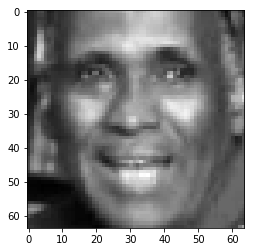

In [5]:
import matplotlib.pyplot as plt
def display(img):
    plt.imshow(img[:,:,0])
    plt.set_cmap('gray')
    plt.show()
idx = 500
sample = images[idx]
print("Gender:",genders[idx])#,"Age:",ages[idx])
display(sample)

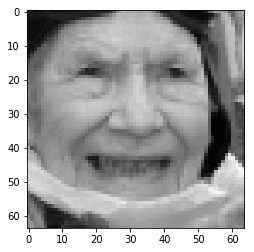

In [6]:
# pre processing
target = np.zeros((size,1),dtype='float32')
features = np.zeros((size,sample.shape[0],sample.shape[1],1),dtype = 'float32')
for i in range(size):
    #target[i,0] = age_group(int(ages[i])) / 4
    
    target[i] = int(genders[i])
    features[i] = images[i]
features = features / 255
display(features[550])

In [7]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(features, target, test_size=0.2,shuffle  = True)
print("Samples in Training:",x_train.shape[0])
print("Samples in Testing:",x_test.shape[0])

Samples in Training: 18966
Samples in Testing: 4742


In [8]:
print("Shape of image:",sample.shape)

Shape of image: (64, 64, 1)


In [9]:
import keras 
from keras.layers import *
from keras.models import *
from keras import backend as K

Using TensorFlow backend.


In [10]:
inputs = Input(shape=(64,64,1))
conv1 = Conv2D(32, kernel_size=(3, 3),activation='relu')(inputs)
conv2 = Conv2D(64, kernel_size=(3, 3),activation='relu')(conv1)
pool1 = MaxPooling2D(pool_size=(2, 2))(conv2)
conv3 = Conv2D(128, kernel_size=(3, 3),activation='relu')(pool1)
pool2 = MaxPooling2D(pool_size=(2, 2))(conv3)
x = Dropout(0.25)(pool2)
flat = Flatten()(x)

dropout = Dropout(0.5)
gender_model = Dense(128, activation='relu')(flat)
gender_model = dropout(gender_model)
gender_model = Dense(64, activation='relu')(gender_model)
gender_model = dropout(gender_model)
gender_model = Dense(32, activation='relu')(gender_model)
gender_model = dropout(gender_model)
gender_model = Dense(16, activation='relu')(gender_model)
gender_model = dropout(gender_model)
gender_model = Dense(8, activation='relu')(gender_model)
gender_model = dropout(gender_model)
gender_model = Dense(1, activation='sigmoid')(gender_model)

In [11]:
model = Model(inputs=inputs, outputs=gender_model)
model.compile(optimizer = 'adam', loss =['binary_crossentropy'],metrics=['accuracy'])

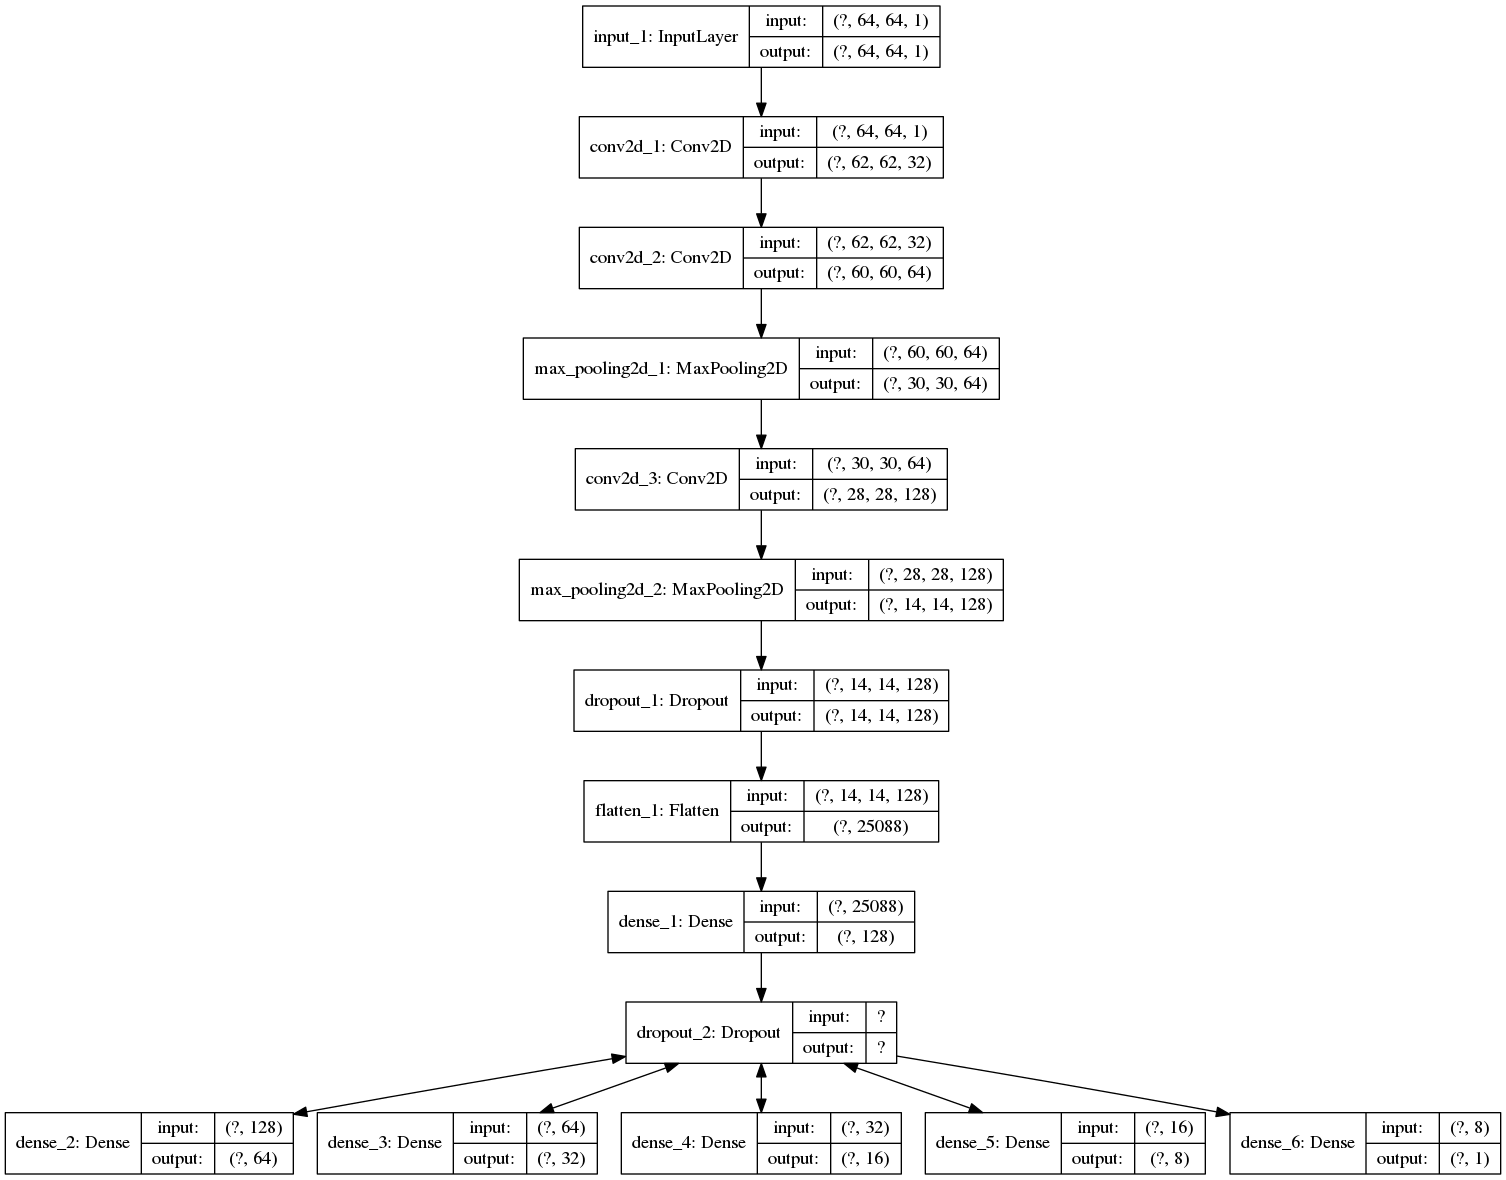

In [40]:
from tensorflow.keras.utils import plot_model
plot_model(model, show_shapes=True)

In [12]:
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 64, 64, 1)    0                                            
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 62, 62, 32)   320         input_1[0][0]                    
__________________________________________________________________________________________________
conv2d_2 (Conv2D)               (None, 60, 60, 64)   18496       conv2d_1[0][0]                   
__________________________________________________________________________________________________
max_pooling2d_1 (MaxPooling2D)  (None, 30, 30, 64)   0           conv2d_2[0][0]                   
____________________________________________________________________________________________

In [13]:
h = model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs = 25, batch_size=128,shuffle = True)

Train on 18966 samples, validate on 4742 samples
Epoch 1/25
18966/18966 [==============================] - 7s 389us/step - loss: 0.6928 - accuracy: 0.5346 - val_loss: 0.6876 - val_accuracy: 0.5424
Epoch 2/25
18966/18966 [==============================] - 4s 219us/step - loss: 0.6604 - accuracy: 0.6233 - val_loss: 0.5583 - val_accuracy: 0.7853
Epoch 3/25
18966/18966 [==============================] - 4s 221us/step - loss: 0.5610 - accuracy: 0.7403 - val_loss: 0.4525 - val_accuracy: 0.8203
Epoch 4/25
18966/18966 [==============================] - 4s 234us/step - loss: 0.5046 - accuracy: 0.7754 - val_loss: 0.3851 - val_accuracy: 0.8486
Epoch 5/25
18966/18966 [==============================] - 4s 220us/step - loss: 0.4671 - accuracy: 0.7956 - val_loss: 0.3531 - val_accuracy: 0.8629
Epoch 6/25
18966/18966 [==============================] - 4s 224us/step - loss: 0.4392 - accuracy: 0.8156 - val_loss: 0.3343 - val_accuracy: 0.8598
Epoch 7/25
18966/18966 [==============================] - 4s 22

In [14]:
model.save('gender_classification_1.h5')

In [15]:
pd.DataFrame(h.history).to_csv('logs.csv')

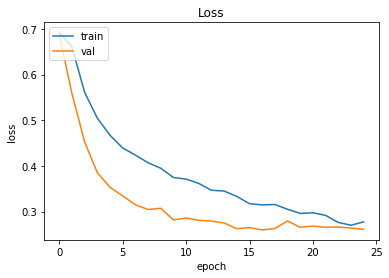

In [16]:
history = h
#history = pd.read_csv("./logs.csv")
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

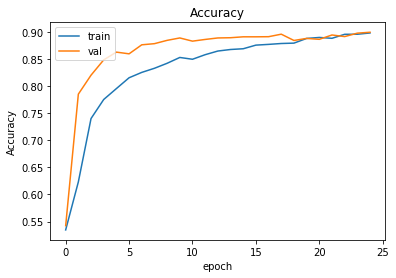

In [17]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

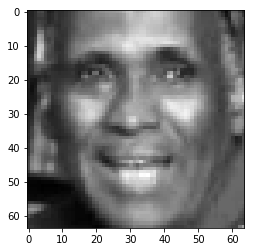

Actual Gender: Male
Values: [[0.5280692]] 
Predicted Gender: Female


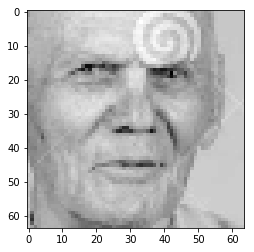

Actual Gender: Male
Values: [[0.06595745]] 
Predicted Gender: Male


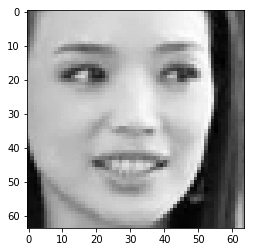

Actual Gender: Female
Values: [[0.9999995]] 
Predicted Gender: Female


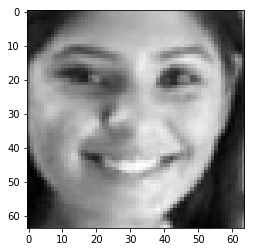

Actual Gender: Female
Values: [[0.99981135]] 
Predicted Gender: Female


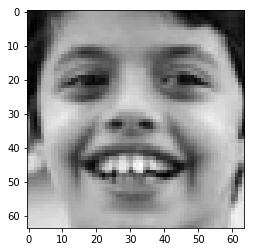

Actual Gender: Male
Values: [[0.07685522]] 
Predicted Gender: Male


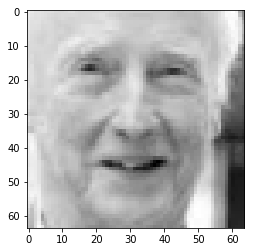

Actual Gender: Male
Values: [[0.1598647]] 
Predicted Gender: Male


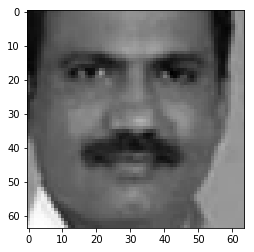

Actual Gender: Male
Values: [[0.02915161]] 
Predicted Gender: Male


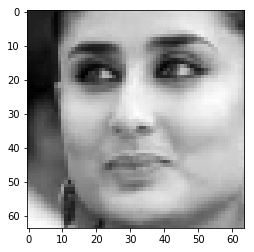

Actual Gender: Female
Values: [[0.99992967]] 
Predicted Gender: Female


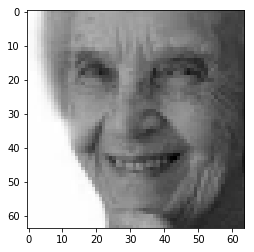

Actual Gender: Female
Values: [[0.8705823]] 
Predicted Gender: Female


In [18]:
def display(img):
    plt.imshow(img[:,:,0])
    plt.set_cmap('gray')
    plt.show()
        
def get_gender(prob):
    if prob < 0.5:return "Male"
    else: return "Female"

def get_result(sample):
    sample = sample/255
    val = model.predict( np.array([ sample ]) )    
    #age = get_age(val[0])
    gender = get_gender(val[0])
    print("Values:",val,"\nPredicted Gender:",gender)
    
    
indexes = [500,59,80,2,4546,7,9,256,45]
for idx in indexes:
    sample = images[idx]
    display(sample)
    print("Actual Gender:",get_gender(genders[idx]))
    res = get_result(sample)

In [19]:
model = load_model("gender_classification_1.h5")

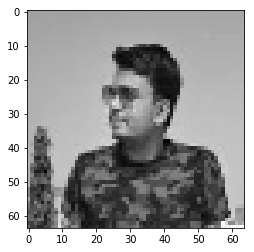

Values: [[0.02915161]] 
Predicted Gender: Male


In [21]:
path = "../input/realdata/REALDATA/me.JPG"
image_rgb = cv2.imread(path,1)
img = cv2.cvtColor(image_rgb, cv2.COLOR_BGR2RGB)
image = cv2.imread(path,0)
image = cv2.resize(image,dsize=(64,64))
image = image.reshape((image.shape[0],image.shape[1],1))
# images.append(image)
# split_var = file.split('_')
# ages.append(split_var[0])
# genders.append(int(split_var[1]) )
display(image)
res = get_result(image)

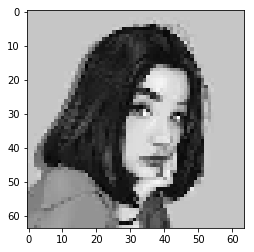

Values: [[0.6516337]] 
Predicted Gender: Female


In [22]:
path = "../input/realdata/REALDATA/download (4).jpg"
image_rgb = cv2.imread(path,1)
img = cv2.cvtColor(image_rgb, cv2.COLOR_BGR2RGB)
image = cv2.imread(path,0)
image = cv2.resize(image,dsize=(64,64))
image = image.reshape((image.shape[0],image.shape[1],1))
# images.append(image)
# split_var = file.split('_')
# ages.append(split_var[0])
# genders.append(int(split_var[1]) )
display(image)
res = get_result(image)

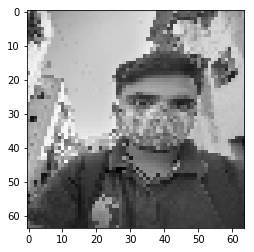

Values: [[0.18839002]] 
Predicted Gender: Male


In [24]:
path = "../input/mewearing-mask/photo_2022-04-30_16-47-11.jpg"
image_rgb = cv2.imread(path,1)
img = cv2.cvtColor(image_rgb, cv2.COLOR_BGR2RGB)
image = cv2.imread(path,0)
image = cv2.resize(image,dsize=(64,64))
image = image.reshape((image.shape[0],image.shape[1],1))
# images.append(image)
# split_var = file.split('_')
# ages.append(split_var[0])
# genders.append(int(split_var[1]) )
display(image)
res = get_result(image)

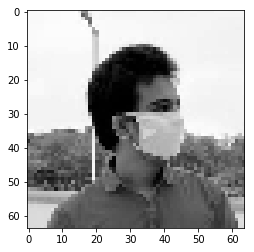

Values: [[0.02915161]] 
Predicted Gender: Male


In [27]:
path = "../input/checking/Checking/photo_2022-04-30_17-18-11.jpg"
image_rgb = cv2.imread(path,1)
img = cv2.cvtColor(image_rgb, cv2.COLOR_BGR2RGB)
image = cv2.imread(path,0)
image = cv2.resize(image,dsize=(64,64))
image = image.reshape((image.shape[0],image.shape[1],1))
# images.append(image)
# split_var = file.split('_')
# ages.append(split_var[0])
# genders.append(int(split_var[1]) )
display(image)
res = get_result(image)

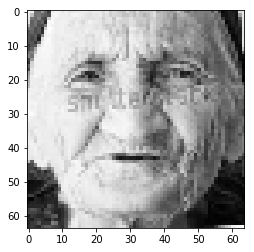

Values: [[0.8971284]] 
Predicted Gender: Female


In [33]:
path = "../input/utkface-new/UTKFace/100_1_0_20170110183726390.jpg.chip.jpg"
image_rgb = cv2.imread(path,1)
img = cv2.cvtColor(image_rgb, cv2.COLOR_BGR2RGB)
image = cv2.imread(path,0)
image = cv2.resize(image,dsize=(64,64))
image = image.reshape((image.shape[0],image.shape[1],1))
# images.append(image)
# split_var = file.split('_')
# ages.append(split_var[0])
# genders.append(int(split_var[1]) )
display(image)
res = get_result(image)

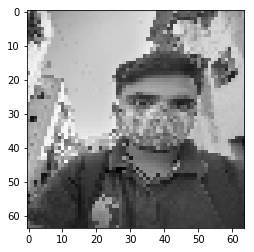

Values: [[0.18839002]] 
Predicted Gender: Male


In [41]:
path = "../input/mewearing-mask/photo_2022-04-30_16-47-11.jpg"
image_rgb = cv2.imread(path,1)
img = cv2.cvtColor(image_rgb, cv2.COLOR_BGR2RGB)
image = cv2.imread(path,0)
image = cv2.resize(image,dsize=(64,64))
image = image.reshape((image.shape[0],image.shape[1],1))
# images.append(image)
# split_var = file.split('_')
# ages.append(split_var[0])
# genders.append(int(split_var[1]) )
display(image)
res = get_result(image)

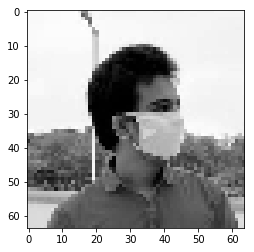

Values: [[0.02915161]] 
Predicted Gender: Male


In [45]:
path = "../input/checking/Checking/photo_2022-04-30_17-18-11.jpg"
image_rgb = cv2.imread(path,1)
img = cv2.cvtColor(image_rgb, cv2.COLOR_BGR2RGB)
image = cv2.imread(path,0)
image = cv2.resize(image,dsize=(64,64))
image = image.reshape((image.shape[0],image.shape[1],1))
# images.append(image)
# split_var = file.split('_')
# ages.append(split_var[0])
# genders.append(int(split_var[1]) )
display(image)
res = get_result(image)

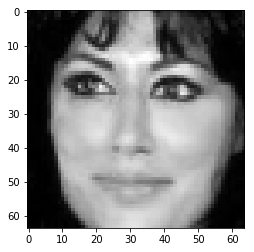

Values: [[0.9963154]] 
Predicted Gender: Female


In [47]:
path = "../input/testing-dataset/TESTING/Validation/WithoutMask/1172.png"
image_rgb = cv2.imread(path,1)
img = cv2.cvtColor(image_rgb, cv2.COLOR_BGR2RGB)
image = cv2.imread(path,0)
image = cv2.resize(image,dsize=(64,64))
image = image.reshape((image.shape[0],image.shape[1],1))
# images.append(image)
# split_var = file.split('_')
# ages.append(split_var[0])
# genders.append(int(split_var[1]) )
display(image)
res = get_result(image)